# Die Corona Lage

## Daten URLs

In [1]:
URL_CORONA_INFECTED = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/" + \
                      "csse_covid_19_data/csse_covid_19_time_series/" + \
                      "time_series_covid19_confirmed_global.csv"
URL_CORONA_RECOVER = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/" + \
                      "csse_covid_19_data/csse_covid_19_time_series/" + \
                      "time_series_covid19_recovered_global.csv"
URL_CORONA_DEATHS = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/" + \
                      "csse_covid_19_data/csse_covid_19_time_series/" + \
                      "time_series_covid19_deaths_global.csv"

## Umsetzung

In [2]:
import csv                       # Intial data parsing (or other/custom)
import datetime                  # Date formatting (optional)

import numpy as np               # Masking, statistics, diffs
import matplotlib.pyplot as plt  # All plotting
import requests                  # Get data from github

%matplotlib notebook

### Herunterladen der Daten von Github

In [3]:
with requests.get(URL_CORONA_INFECTED) as data:
    infected = list(csv.reader(data.content.decode('utf-8').splitlines(), delimiter=','))
with requests.get(URL_CORONA_RECOVER) as data:
    recovered = list(csv.reader(data.content.decode('utf-8').splitlines(), delimiter=','))
with requests.get(URL_CORONA_DEATHS) as data:
    deaths = list(csv.reader(data.content.decode('utf-8').splitlines(), delimiter=','))

### Aufreinigen der Daten

* Aus der Infected Tabelle sind die Datumsangaben entnommen
* Daten in eine übersichtliche Dictionary Struktur bringen `data[region][state]["infected"/"recovered"/"deaths"]`.
* Für Länder mit mehreren Provinzen Gesamtzahlen berechnen.
* Für manche Ländern sin für einzelne Provinzen keine *recovered* Zahlen gegeben

In [4]:
data = {}
dates = [datetime.datetime.strptime(date, "%m/%d/%y").date() for date in infected[0][4:]]
for state, region, latitude, longitude, *numbers in infected[1:]:
    numbers = np.array(numbers, dtype=np.int)
    state = state if state != "" else "total"
    if region not in data.keys():
        data[region] = {state: {"lat": latitude, "long": longitude, "infected": numbers}}
    else:
        data[region][state] = {"lat": latitude, "long": longitude, "infected": numbers}
for region, state_data in data.items():
    if len(state_data) > 1:
        state_data["total"] = {"infected": np.sum(np.array([state["infected"]
                                                            for state in state_data.values()]), axis=0)}
for state, region, latitude, longitude, *numbers in recovered[1:]:
    numbers = np.array(numbers, dtype=np.int)
    state = state if state != "" else "total"
    data[region][state]["recovered"] = numbers
for state, region, latitude, longitude, *numbers in deaths[1:]:
    numbers = np.array(numbers, dtype=np.int)
    state = state if state != "" else "total"
    data[region][state]["deaths"] = numbers
for region, state_data in data.items():
    if len(state_data) > 1 and isinstance(state_data["total"].get("recovered", False), bool):
        state_data["total"]["recovered"] = np.sum(np.array([nums["recovered"]
                                                            for state, nums in state_data.items()
                                                            if state != "total"
                                                           ]), axis=0)
    if len(state_data) > 1 and isinstance(state_data["total"].get("deaths", False), bool):
        state_data["total"]["deaths"] = np.sum(np.array([nums["deaths"]
                                                         for state, nums in state_data.items()
                                                         if state != "total"
                                                        ]), axis=0)

for region, state_data in data.items():
    print(region)
    for state, nums in state_data.items():
        print(state)
        print(nums['infected'])
        print(nums.get('recovered', data[region]["total"]["recovered"]))
        print(nums['deaths'])

Afghanistan
total
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    1    1    1    1    1    1    1    1    1
    1    1    1    1    4    4    5    7    7    7   11   16   21   22
   22   22   24   24   40   40   74   84   94  110  110  120  170  174
  237  273  281  299  349  367  423  444  484  521  555  607  665  714
  784  840  906  933  996 1026 1092 1176 1279 1351 1463 1531 1703 1828
 1939 2171 2335 2469 2704 2894 3224 3392 3563]
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   1   1   1   1   1   1   1   1   1   2   2   2   2   2   2   5   5  10
  10  10  15  18  18  29  32  32  32  32  32  40  43  54  99 112 131 135
 150 166 179 188 188 207 220 228 252 260 310 331 345 397 421 458 468]
[  

[   2    3    5    7    8    8   14   14   14   19   19   19   19   25
   25   25   25   32   32   32   33   33   33   33   33   34   35   35
   35   35   35   35   35   35   37   40   40   41   42   42   43   43
   43   47   48   50   50   50   53   59   70   75   82  114  147  177
  212  272  322  411  599  721  827  934 1045 1136 1245 1388 1524 1651
 1771 1875 1978 2067 2169 2220 2258 2369 2423 2473 2518 2551 2579 2613
 2643 2672 2700 2733 2765 2792 2811 2826 2839 2907 2907 2922 2931 2938
 2947 2954 2960 2966 2969 2987 2988 2989 2992]
[   0    0    0    0    2    2    5    5    5    5    5    5    5    5
    5    5    5   10   10   10   10   10   12   12   12   14   15   15
   15   15   17   17   21   21   22   22   22   28   28   28   31   31
   31   31   31   31   31   31   33   34   34   35   35   35   35   41
   42   42   42   42   44   44   52   70   88   97   97   97  229  342
  505  505  612  674  793  793  888  888  940 1013 1135 1218 1288 1405
 1497 1593 1689 1787 1928 1999

### Statistische Auswertung

* 1
* 2
* 3

In [5]:
def get_diff_data(country, state, dtype):
    return np.diff(data[country][state][dtype], prepend=[0])

def get_diff_max(country, state, dtype):
    return max(get_diff_data(country, state, dtype))

def get_diff_mean(country, state, dtype, last_x_days=None):
    start_idx = 0 if last_x_days is None else 0 - last_x_days
    return np.mean(get_diff_data(country, state, dtype)[start_idx:])

def above_treshold(country, state, dtype, treshold):
    mask = get_diff_data(country, state, dtype) > treshold
    return np.arange(len(dates))[mask], get_diff_data(country, state, dtype)[mask]

def days_above_treshold(country, state, dtype, treshold, last_x_days=None):
    start_idx = 0 if last_x_days is None else 0 - last_x_days
    return np.sum(get_diff_data(country, state, dtype)[start_idx:] > treshold)

def mean_newly_infected(country, state, last_x_days=None):
    start_idx = 0 if last_x_days is None else 0 - last_x_days
    return np.mean(get_diff_data(country, state, "infected")[start_idx:])

def get_ill_data(country, state):
    return data[country][state]["infected"] - data[country][state]["recovered"]

def maximum_ill(country, state):
    return max(get_ill_data(country, state))

def mean_ill(country, state, last_x_days=None):
    start_idx = 0 if last_x_days is None else 0 - last_x_days
    return np.mean(get_ill_data(country, state)[start_idx:])

def print_statistics(country, state, treshold=False):
    stats = f"""{"#" * (23 + (len(country) + len(state)))}
# Information for {country} - {state} #
{"#" * (23 + (len(country) + len(state)))}

Total Infected: {data[country][state]["infected"][-1]:>10} | Total Recovered: {data[country][state]["recovered"][-1]:>10} | Total Deaths: {data[country][state]["deaths"][-1]:>10}
---------------------------+-----------------------------+-------------------------
Infected Today: {get_diff_data(country, state, "infected")[-1]:>10} | Recovered Today: {get_diff_data(country, state, "infected")[-1]:>10} | Deaths Today: {get_diff_data(country, state, "deaths")[-1]:>10}
Infected Mean Total: {get_diff_mean(country, state, "infected", last_x_days=None):>5.0f} | Recovered Mean Total: {get_diff_mean(country, state, "recovered", last_x_days=None):>5.0f} | Deaths Mean Total: {get_diff_mean(country, state, "deaths", last_x_days=None):>5.0f}
Infected Mean Week: {get_diff_mean(country, state, "infected", last_x_days=7):>6.0f} | Recovered Mean Week: {get_diff_mean(country, state, "recovered", last_x_days=7):>6.0f} | Deaths Mean Week: {get_diff_mean(country, state, "deaths", last_x_days=7):>6.0f}
---------------------------+-----------------------------+-------------------------
Currently Ill: {get_ill_data(country, state)[-1]:>11} | Mean Ill Week: {mean_ill(country, state, 7):>12.0f} | Maximum Ill: {maximum_ill(country, state):>11}"""
    if treshold:
        stats += f"\nTreshold: {treshold:>16} | Days Above: {days_above_treshold(country, state, 'infected', treshold):>15} | Days Above Week: {days_above_treshold(country, state, 'infected', treshold, 7):>7}"
    stats += "---------------------------+-----------------------------+-------------------------"
    print(stats)

### Grafische Darstellung

* `plot_data` stellt die Infektions-, Heilungs- und Todeszahlen für ein Land und Provinz dar.
* `plot_current_infected` stellt die aktuell Infizierten in einem Land dar.
* `plot_diff` stellt die aktuelle Änderung der Infektions-, Heilungs- und Todeszahlen in einem Land dar.
* `plot_above_treshold` zeigt jene Tage, an denen die Neuinfektionen über einem bestimmten Wert lagen.

In [6]:
def plot_data(country, state, log=False, ticks=30):
    plt.figure(f"Data - {country}", [8, 5], 100)
    plt.title(f"Corona in {country} - {state}")
    plt.plot(range(len(dates)), data[country][state]["infected"], 'y', label="Infected")
    plt.plot(range(len(dates)), data[country][state]["recovered"], 'g', label="recovered")
    plt.plot(range(len(dates)), data[country][state]["deaths"], 'r', label="deaths")
    if log:
        plt.semilogy()
    plt.legend()
    plt.ylim(1 if log else 0, max(data[country][state]["infected"]) * (3 if log else 1.05))
    plt.xlim(0, len(dates))
    plt.xticks(ticks=range(len(dates))[::ticks], labels=[date for date in dates[::ticks]])
    plt.show()

def plot_current_infected(country, state, log=False, ticks=30):
    plt.figure(f"Current Infected - {country}", [8, 5], 100)
    plt.title(f"Corona in {country} - {state}")
    plt.plot(range(len(dates)), get_ill_data(country, state), 'k', label="Currently Infected")
    if log:
        plt.semilogy()
    plt.legend()
    plt.ylim(1 if log else 0, max(get_ill_data(country, state)) * (3 if log else 1.05))
    plt.xlim(0, len(dates))
    plt.xticks(ticks=range(len(dates))[::ticks], labels=[date for date in dates[::ticks]])
    plt.show()
    
def plot_diff(country, state, log=False, ticks=30):
    plt.figure(f"Diff Data - {country}", [8, 5], 100)
    plt.title(f"Corona in {country} - {state}")
    plt.plot(range(len(dates)), get_diff_data(country, state, "infected"), 'y', label="Infected")
    plt.plot(range(len(dates)), get_diff_data(country, state, "recovered"), 'g', label="recovered")
    plt.plot(range(len(dates)), get_diff_data(country, state, "deaths"), 'r', label="deaths")
    if log:
        plt.semilogy()
    plt.ylim(1 if log else 0, get_diff_max(country, state, "infected") * (3 if log else 1.05))
    plt.xlim(0, len(dates))
    plt.legend()
    plt.xticks(ticks=range(len(dates))[::ticks], labels=[date for date in dates[::ticks]])
    plt.show()
    
def plot_above_treshold(country, state, treshold, log=False, ticks=30):
    plt.figure(f"Above Treshold-{country}", [8, 5], 100)
    diff_infected = get_diff_data(country, state, "infected")
    treshold_mask = diff_infected > treshold
    x_points = np.array(range(len(dates)))
    plt.title(f"Corona in {country} - {state}")
    plt.vlines(x_points[treshold_mask], ymin=0, ymax=1e10, colors=[1, 0.85, 0.85, 1], linewidths=4.5, label=f"above {treshold}")
    plt.plot(x_points, diff_infected, 'y', label="Infected")
    if log:
        plt.semilogy()
    plt.ylim(1 if log else 0, get_diff_max(country, state, "infected") * (3 if log else 1.05))
    plt.xlim(0, len(dates))
    plt.legend()
    plt.xticks(ticks=range(len(dates))[::ticks], labels=[date for date in dates[::ticks]])
    plt.show()

## Ergebnisse

### Statistik

In [7]:
print_statistics("Germany", "total", treshold=1500)

###################################
# Information for Germany - total #
###################################

Total Infected:     169430 | Total Recovered:     141700 | Total Deaths:       7392
---------------------------+-----------------------------+-------------------------
Infected Today:       1268 | Recovered Today:       1268 | Deaths Today:        117
Infected Mean Total:  1583 | Recovered Mean Total:  1324 | Deaths Mean Total:    69
Infected Mean Week:    917 | Recovered Mean Week:   2600 | Deaths Mean Week:    110
---------------------------+-----------------------------+-------------------------
Currently Ill:       27730 | Mean Ill Week:        32794 | Maximum Ill:       74674
Treshold:             1500 | Days Above:              40 | Days Above Week:       0---------------------------+-----------------------------+-------------------------


### Datenüberblick

<IPython.core.display.Javascript object>


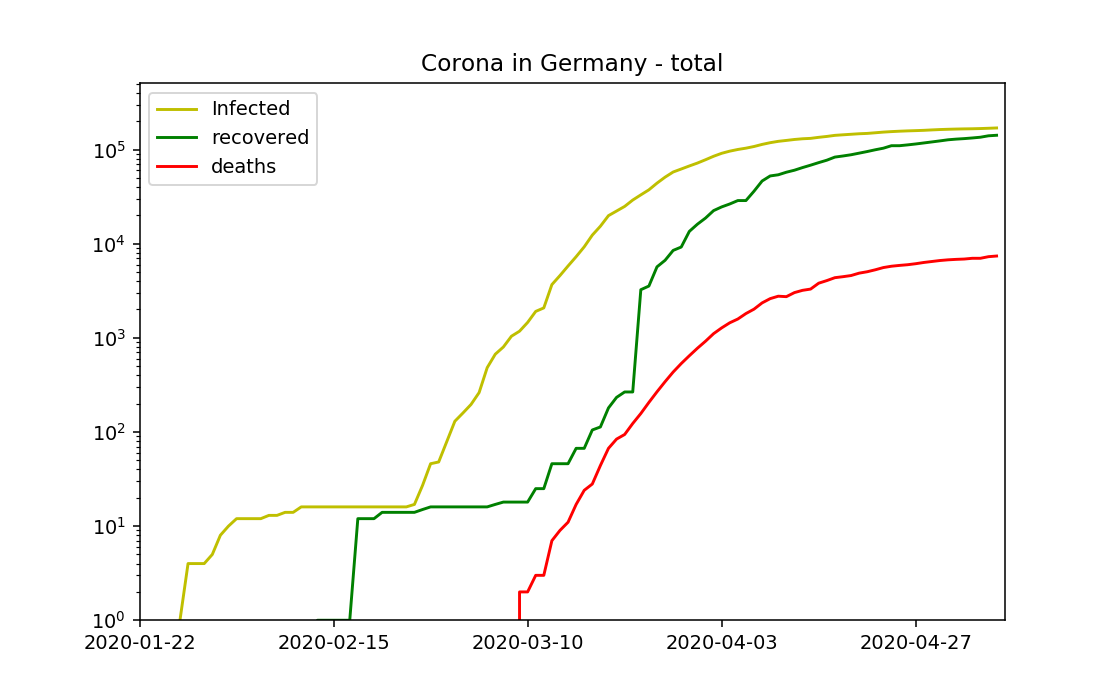

In [8]:
plot_data(country="Germany", state="total", log=True, ticks=24)

### Aktuell Infiziert

<IPython.core.display.Javascript object>


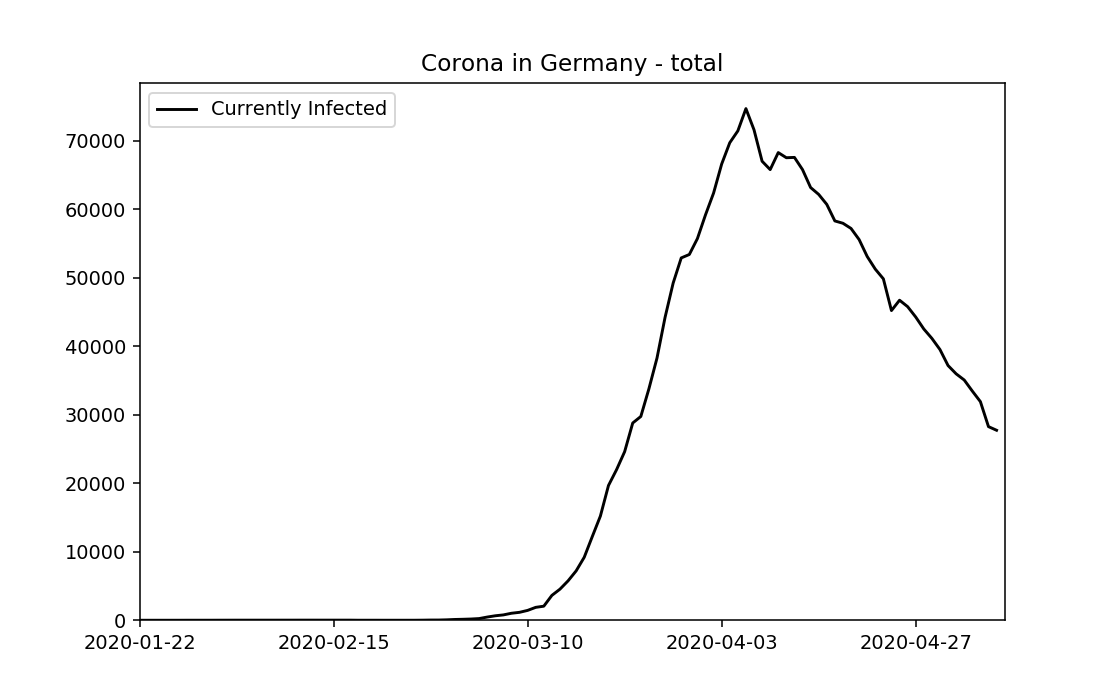

In [9]:
plot_current_infected(country="Germany", state="total", log=False, ticks=24)

### Änderung pro Tag

<IPython.core.display.Javascript object>


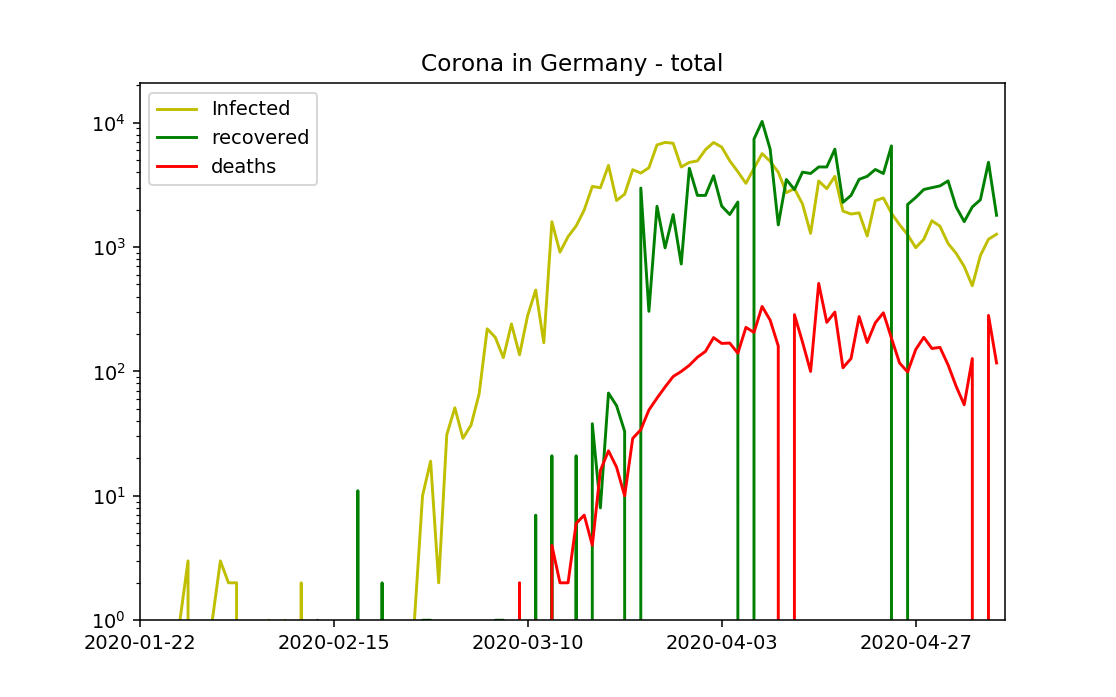

In [10]:
plot_diff(country="Germany", state="total", log=True, ticks=24)

### Obergrenze überschritten

<IPython.core.display.Javascript object>


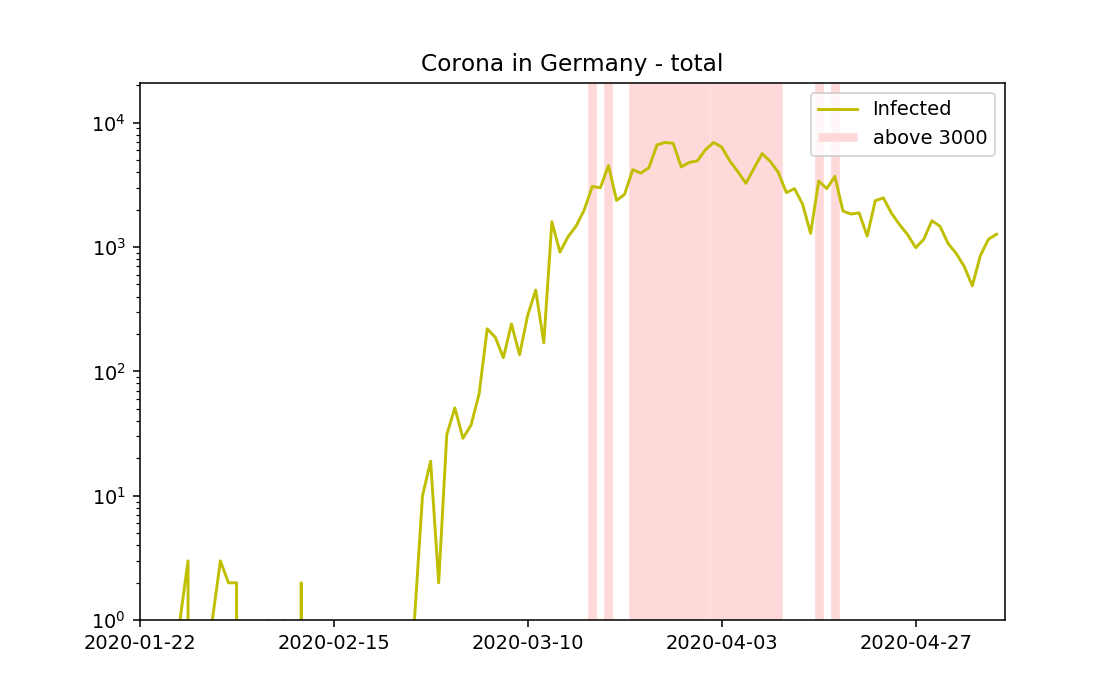

In [11]:
plot_above_treshold(country="Germany", state="total", treshold=3000, log=True, ticks=24)